## Contours 
### B+W foregrounds and backgrounds

0 255


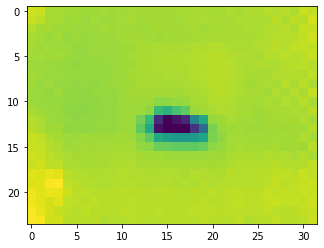

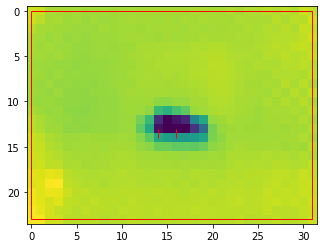

In [34]:
# Standard imports
import cv2 as cv
import numpy as np
import seaborn as sns
import matplotlib.patches as patches

# Read image
# im = cv2.imread("apple-256261_640.jpg", cv.COLOR_BGR2GRAY)

im = np.load(open("Results/1/0_0.npy", "rb"))
im = 255*(im - np.min(im))/np.ptp(im)
im = im.astype(np.uint8)
# sns.heatmap(im)
# plt.show()
plt.imshow(im)
print(im.min(), im.max())

contours, h = cv.findContours(im,  cv.RETR_TREE,  cv.CHAIN_APPROX_SIMPLE)
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(im)

for c in contours:
    w = abs(c[-1][0][0] - c[1][0][0])
    h = abs(c[1][0][1] - c[0][0][1])
#     print(c[0][0], w,h)
    rect = patches.Rectangle(c[0][0], w,h, linewidth=1, edgecolor='r',facecolor='none')
    ax.add_patch(rect)

---
## Find blobs
### Load img

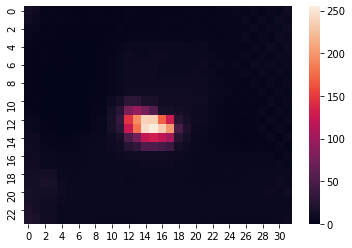

In [28]:
# Standard imports
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import seaborn as sns

# Read image
# im = cv2.imread("apple-256261_640.jpg")
# print(im.min(), im.max())

im = np.load(open("Results/1/0_30.npy", "rb"))
# im = 5*(im - np.min(im))/np.ptp(im)
im = 255*(im - min(im.flatten())) / (max(im.flatten())-min(im.flatten()))
im = im.astype(np.uint8)
sns.heatmap(im)
plt.show()

### Resize

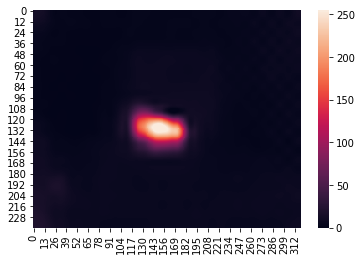

In [34]:
s = 10 #resize factor
res = cv2.resize(im, dsize=(32*s,24*s), interpolation=cv2.INTER_CUBIC)
sns.heatmap(res)
plt.show()

### Crop

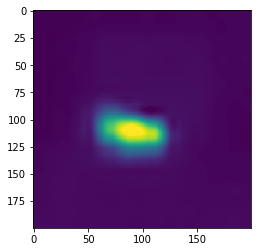

In [65]:
def crop(img, pixel_range = 5):
    x,y = img.shape
    mid_x, mid_y = int(x/2), int(y/2)
    row_indices = range(mid_x-pixel_range, mid_x+pixel_range)
    col_indices = range(mid_y-pixel_range, mid_y+pixel_range)
    cropped = []
    for row in row_indices:
        to_add = []
        cropped.append([])
        for col in col_indices:
            to_add.append(img[row, col])
        cropped[-1] = np.array(to_add)
    return np.array(cropped)
im = crop(res, 100)
plt.imshow(im)

### Detect

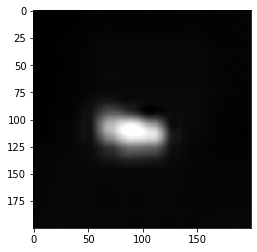

In [66]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 1
params.maxThreshold = 100
params.minDistBetweenBlobs = 4

# Filter by Area.
params.filterByArea = True
params.minArea = 1
# params.maxArea = 50

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.5

# Filter by Convexity
# params.filterByConvexity = True
# params.minConvexity = 0.5
# params.maxConvexity = 1

# Filter by Inertia
# params.filterByInertia = True
# params.minInertiaRatio = 0.1
# params.maxInertiaRatio = 0.7

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(im)
try:
    print(keypoints[0].size)
except:
    pass

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)

---
## AlexNet

In [75]:
# ! python3 -m pip install 'torchvision>=0.5.0'
import torch as t
import torchvision.models as models
net = models.alexnet(pretrained=True)

In [76]:
# cim = np.stack((im,)*3, axis=-1)
cim = np.array([im, im, im])
cim=t.Tensor(cim).unsqueeze(0)
cim.shape

torch.Size([1, 3, 200, 200])

torch.Size([5, 5])


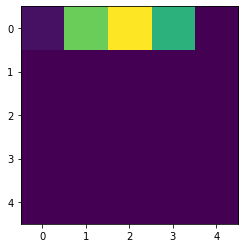

In [77]:
out = net.features(cim)[0][11]
print(out.shape)
plt.imshow(out.detach().numpy())

---
## Blob example

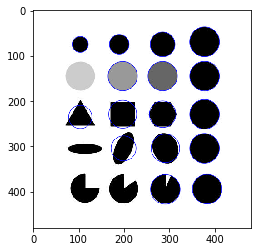

In [335]:
# Read image
im = cv2.imread("blob.jpg", cv2.IMREAD_GRAYSCALE)
 
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs.
keypoints = detector.detect(im)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)